* **CONTENTS**
    * Ordinary Lease Square (OLS)
    * Linear Regression - Problem Example
    * Cost Function (Lost Function)
    * Gradient Descent
    * Scikit Learn and Python
    * Scikit Learn train test split
    * Scikit Learn Performance Evaluation - Regression
    * Mean Absolute Error (MAE)
    * Mean Squared Error (MSE)
    * Root Mean Sqaure Error (RMSE)
    * Residual Points
    * Model Deployment
    * Polynomial Regression
    * Polynomial Regression - Creating Polynomial Features
    * Polynomial Regression - Training and Evaluation
    * Bias Variance Trade-off (Overfitting vs Underfitting)
    * Polynomial Regression - Choosing the degeree of polynomial
    * Polynomial Regression - Model Deployment
    * Regularization
    * Feature Scaling
    * Introduction to Cross Validation
    * Regularization for Linear Regression Data Setup
    * L2 Regularization - Ridge regression Theory
    * L1 Regularization - LASSO Regression 

### ORDINARY LEAST SQUARE (OLS)

* Linear Regression OLS Theory
    * We know the equation of a simple straight line: y= mx+b, where m is the slope and b is intercept with y-axis (where the line crosses the y-axis when x=0).
    * We can see for y=mx+b there is only room for one possible feature x.
    * OLS will allow us to directly solve for the slope **m** and intercept **b**.
    * If we have multiple features then we would require the use of gradient descent to scale it.
    * Linear Regression allows us to build a relationship between multiple features to estimate a target output.
    * For us to translate we will consider the multiple features to be a **matrix X** and a **Vector Y** which contains the actual labels that we are trying to predict.
    
 * Positive Slope : when m is greater than 0.
 * Negative Slope : when m is lesser than 0.
 * Zero Slope : when m is equal than 0.
 
     * In linear regression, where we try to formulate the relationship between variables, y=mx+b becomes, y'(y-hat) = Beta_not + ((Beta_one)(x)).
     * Our goal is to predict the value of the dependent variable (y) based on that of an independent variable(x).
     * To derive the Beta_not and Beta_one:
         * Beta_one = Pearson Correlation Coefficient ( Standard_Deviation_of_X/Standard_Deviation_of_Y )
         
**FROMULA FOR BETA_ONE AND BETA_NOT:**
     Get the mean for **x** column and **y** column
     * Beta_one = (Summation of(xi - mean(x))(yi - mean(y))/square of sum of (xi - mean(x)))
     * Beta_not = (mean(y)-((Beta_one)(mean(x))))
         
**LIMITATION OF LINEAR REGRESSION**
 * It can work only with Linear Datas.(A Linear data structure have data elements arranged in sequential manner and each member element is connected to its previous and next element. This connection helps to traverse a linear data structure in a single level and in single run. Such data structures are easy to implement as computer memory is also sequential)
         

### Linear Regression- Problem Example
* A manager wants to find the relationship between the number of  hours that a plant is operational in a week and weekly production.
* Here the independent variable x is hours of operation, and the dependent variabel y is production volume.
* As we expand to more than a single feature however, an analytical solution quickly becomes unscalable.
* Instead we shift focus on minimizing a cost function with gradient descent.

* We can use the gradient descent to solve a cost function to calculate the Beta Values dealing with more than one feature.

### COST FUNCTION (LOST FUNCTION)

* We know that our prediction y'(hat) = sum of(Beta(i) times x(i)) (which is the sum of some beta coeffiecient multiplied by its feature.
* Now how do we find the beta coeffiecient? 
    * The best fit line is going to minimize the squared error.
* The residual error for a row  j is going to be y(j) - y'(j). and the **Sqaured error** for some row j is going to be square of (y(j)-y'(j)).
* Sum of squared errors from m rows is then the sum of (y(j) - y'(j)) for all the m rows. and to get the averaged sqaured error values then , 1/m(sum of (y(j) - y'(j)) for all the m rows). 

### GRADIENT DESCENT
* We can describe the cost fucntion through vectorized matrix notation and use **gradient descent** to have the computer figure out the set of beta coefficient values that minimize the cost/loss function.
* Our goal is to find the set of beta coefficient values that minimize the error(cost function). Leverage the computational poer instead of having to manually attempt to analytically solve the derivative.
* we can use a Gradient to express the derivatives of the cost fucntion with respect to each beta.
 
**BASED ON MY UNDERSTANDING**
* The matrix is created with data values for a faster computationan and the operations are performed on the matrix by the numpy libraries. The Gradient descent is to reduce the cost/loss funciton which in other words is to reduce the error, we have to optimize the algroithms.


### CODE FOR LINEAR REGRESSION.

* Note that the simple linear regression is only one feature.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("Advertising.csv") #Reading the csv file. Note the file has TV spend, Radio spend and the newspaper spend, which are three differnet features
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend']= df['TV']+df['radio']+df['newspaper'] # Adding the three spends and engineering total_spend(engineering is to add manually) where as the original datas where TV, radio and newspaper
df.head() # Now x is the total_spend and the y is the sales. (for a simple linear regression)

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


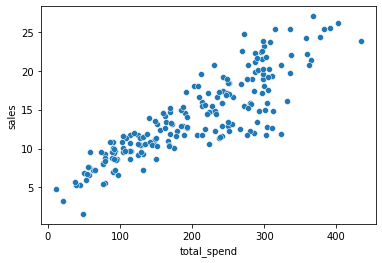

In [5]:
 sns.scatterplot(data=df, x='total_spend', y='sales') # Plotting the relation between sales and total_spend; from the graph it is shown that the greater the total spend on advertising, greater is the sales

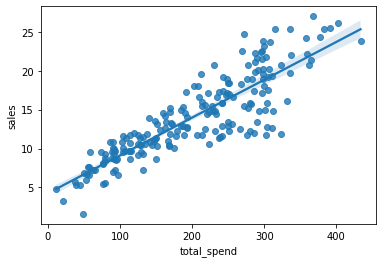

In [6]:
sns.regplot(data=df,x='total_spend',y='sales') # The reg plot is the regression line plot , where for the care of simple linear regression where we have one X feature and one Y vector, Seaborn is able to actually plot out the regression line using ordinary squares.

# This show the best fit line.

In [7]:
X= df['total_spend'] # The capital X is for the feature matix
y = df['sales'] # The lowercase y is for the target output/expected label

In [8]:
#y=mx+b
help(np.polyfit) # The polyfit does the least fit polynomial fit; this gives the Beta_one and the Beta_not values of the equation y=B1x+Bo

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [9]:
np.polyfit(X,y,deg=1)# here the X and y are the data points and the expected outputs, and the degree is used to specify which fit.(deg 1= x fit, deg 2= x_square fit)
#The two values are the B1 and Bo respectively. Now with this we can get the sales for the total_spend.
# Note the beta values are given from the order of highest order coefficients (from B1 to B0)

array([0.04868788, 4.24302822])

In [10]:
potential_spend =np.linspace(0,500,100) # Creating a variable and getting 100 linearly spaced points between 0 and 500

In [11]:
predicted_Sales= 0.04868788*potential_spend +4.24302822  # Creating a predicted_sale variable(y) using the B1 * potential_spend(x) + Bo values

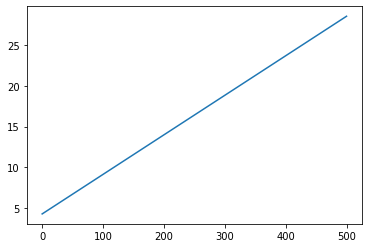

In [12]:
plt.plot(potential_spend,predicted_Sales) #Plots regression line of the potential spend vs the predicted sale

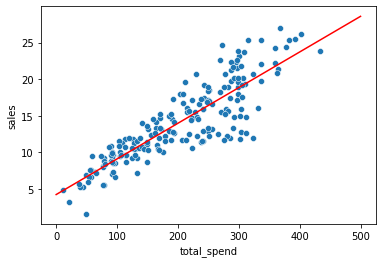

In [13]:
sns.scatterplot(data=df,x='total_spend',y='sales') # Creating the plot with the real data points
plt.plot(potential_spend,predicted_Sales, color= 'red') # Creating the line over the real data points

In [14]:
spend= 200
predicted_Sales = 0.04868788*spend +4.24302822 # Gives the sale for the spend of 200 dollar
predicted_Sales

13.98060422

In [15]:
np.polyfit(X,y,deg=3) # Here the polynomial is 3; Y= (B3*X3)+(B2*X2)+(B1*X)+B0
# Note the values displayed are for X_cube, x_squre, x and y-intercept

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [16]:
pot_spend = np.linspace(0,500,100) # Getting 100 linearly spaced values between 0 to 500 and then putting it in the equation Y= (B3*X3)+(B2*X2)+(B1*X)+B0 to get the prediction
pred_sale =  3.07615033e-07* pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend +2.70495053e+00 # This is by substituting the x with the X values and the Beta Values in the equation
pred_sale # Gives the predicted sales value for each potential spend

array([ 2.70495053,  3.11474825,  3.51512186,  3.90630911,  4.28854779,
        4.66207567,  5.02713053,  5.38395013,  5.73277224,  6.07383466,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107318,
        7.97057059,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998503,
        9.38138371,  9.64787596,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506288, 11.15710981, 11.39591473, 11.63171541,
       11.86474963, 12.09525515, 12.32346975, 12.54963121, 12.77397729,
       12.99674578, 13.21817443, 13.43850104, 13.65796337, 13.87679919,
       14.09524628, 14.31354241, 14.53192536, 14.75063289, 14.96990278,
       15.18997281, 15.41108075, 15.63346437, 15.85736144, 16.08300974,
       16.31064705, 16.54051112, 16.77283975, 17.0078707 , 17.24584174,
       17.48699065, 17.73155521, 17.97977318, 18.23188233, 18.48812045,
       18.74872531, 19.01393467, 19.28398632, 19.55911802, 19.83956755,
       20.12557268, 20.41737119, 20.71520085, 21.01929943, 21.32

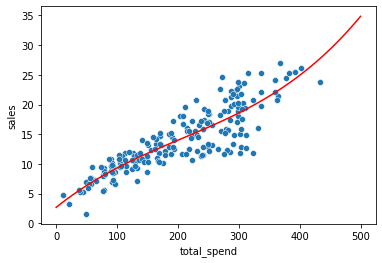

In [17]:
sns.scatterplot(data=df,x='total_spend',y='sales') # Creating the plot with the real data points
plt.plot(pot_spend,pred_sale, color= 'red') # Creating the line over the real data points.

### SCIKIT LEARN AND PYTHON

* Scikit Learn is a library containing many machine learning algorithms.
* It utilizes a generalized "estimator API" framework to calling the models.
* This means the wary algorithms are imported, fitted and used is uniform across all algorithms.
* This allows users to easily swap algorithms in and out and test various approaches:
* Important Note:
    * This uniform framework also means users can easily apply almost any algorithm effectively without truly understanding what the algorithm is doing.
* Scikit learn also comes with many convenience tools, including train test split functions, cross validation tools, and a variety fo reporting metric functions.


### SCIKIT LEARN TRAIN TEST SPLIT

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df= pd.read_csv("Advertising.csv") # Reading the Advertising.csv file
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


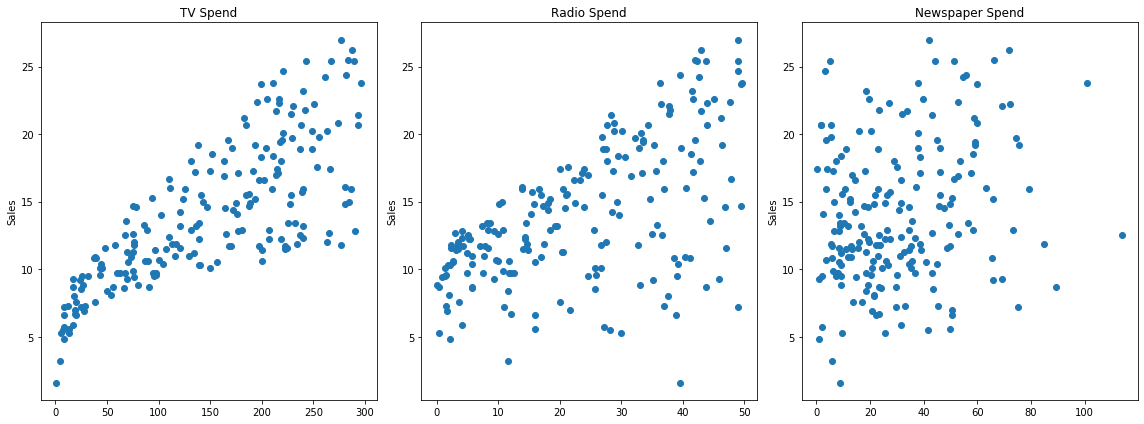

In [20]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();


# The above code is to find the relationship between the particular advertissing medium with sales

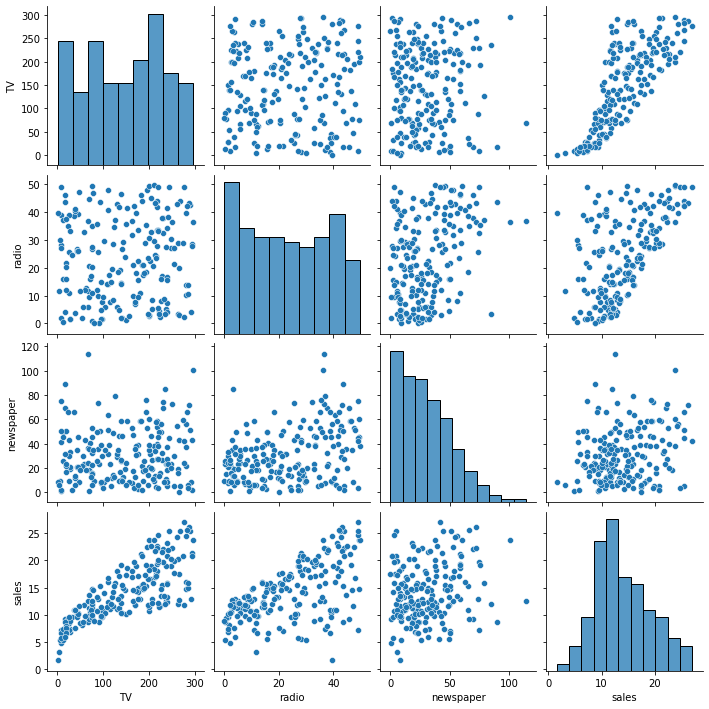

In [21]:
sns.pairplot(df) # This gives a similar plot as the above, but also compares the relationship between each feature.

In [22]:
X=df.drop("sales", axis=1)  # This creates a matrix to represent all the features, and features are typically all the other column than the label columns

In [23]:
X # This has dropped the sales column

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [24]:
y = df["sales"] # Creates a vector y that holds the label column

In [25]:
from sklearn.model_selection import train_test_split  #This creates a train and test set. And remember there ar efour components X_train, X_test and y_train and y_test

In [26]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

In [27]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)  
# "X_train, X_test, y_train, y_test" 4 components;  Then we pass in all our features X and the corresponding Y label.
# The testsize ask us what percentage of the data should go into test size; by convention it is either 20 or 30%.
# Random State is similar to setting a random seed. 

In [28]:
# The way how tuple unpacking works is that it first seperates out the features and then seperates out the label. Note the tuple unpacking is very difficult.
# Copy paste the above syntax by typing out train_test_ split and press shift+tab. From the description copy paste the above syntax

In [29]:
len(df) # Gives the Size of the entire dataframe

200

In [30]:
X_train #The length of the X_train is 134 as 0.7% of data set has been assigned to X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
93,250.9,36.5,72.3
154,187.8,21.1,9.5
114,78.2,46.8,34.5
118,125.7,36.9,79.2
64,131.1,42.8,28.9


In [31]:
y_train #The length of the y_train is 134 as 0.7% of data set has been assigned to y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
93     22.2
154    15.6
114    14.6
118    15.9
64     18.0
165    11.9
24      9.7
188    15.9
117     9.4
13      9.7
52     22.6
161    13.3
147    25.4
56      5.5
199    13.4
150    16.1
159    12.9
182     8.7
185    22.6
193    19.6
27     15.9
192     5.9
167    12.2
104    20.7
197    12.8
       ... 
126     6.6
19     14.6
72      8.8
44      8.5
162    14.9
59     18.4
178    11.8
157    10.1
115    12.6
136     9.5
111    21.8
83     13.6
49      9.7
191     9.9
140    10.9
5       7.2
110    13.4
60      8.1
168    17.1
195     7.6
132     5.7
40     16.6
137    20.8
75      8.7
87     16.0
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [32]:
X_test  #The length of the X_test is 66 as 0.3% of data set has been assigned to X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [33]:
y_test #The length of the y_test is 66 as 0.3% of data set has been assigned to y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [34]:
from sklearn.linear_model import LinearRegression # Imports Linear Regress from the linear_model family
# After typing from sklearn. press tab to see the various model families, select the desires one and after typing import press it gives the model list

In [35]:
help(LinearRegression) #hyper parameters are parameters or constants within the model itself that we can edit to try to adjust for better performance.

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin, sklearn.base.MultiOutputMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False`

In [36]:
model = LinearRegression() # Creating a instance of a Linear Regression Model. Note the variable model is on which the data is going to be trained on

In [37]:
model.fit(X_train,y_train) # Note in this we don't have to mention model= model.fit as it is a variable within the scikit learn we can use model.fit
# Similary the variables to be trained on are the X_train and y_test as we dont want to tain the entire dataset for this instance

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
model.predict(X_test)#reports back all its predictions for the corresponding Y values to each of those X test feature sets.

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

### SCIKIT LEARN PERFORMANCE EVALUATION - REGRESSION

* The evaluation metrics like accuracy or recall aren't useful for regression problems, we need metrics designed for continuous values!
* Some of the most common evaluation metrics for regression:
    * Mean Absolute Error
    * Mean Squared Error
    * Root Mean Square Error
* The metrics shown here apply to any regression task, not just linear regression!

### MEAN ABSOLUTE ERROR (MAE):
   * This is the mean of the absolute value of errors.
   * 1/n(summation of i to n) = |y(i)-y'(i)| (sum the absolute values for all n entries and divide it by n to get the mean)
   * MAE won't punish large errors however.
   
### MEAN SQUARED ERROR (MSE):
   * Largers errors are "punished" more than MAE, making MSE more popular.
   * 1/n(summation of i to n) = |y(i)-y'(i)| the whole square
   * Issue with MSE:
       * Different units than y
       * It reports units of y squared.
       
### ROOT MEAN SQUARE ERROR (RMSE):
   * This is the root of the mean of the squared errors.
   * Most popular and has the same units as y
   * square root of (1/n(summation of i to n) = |y(i)-y'(i)| the whole square)

In [39]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [43]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [48]:
test_predictions= model.predict(X_test) # Using the model to predict the value of X_test which hasn't been tested and we can compare that with the tested y_test values.
test_predictions #the predicted value for y(test_predictions)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error # imports the metrics from sklearn and for the root mean squared we can get the root mean of mean_squared_error.
# This metrics gives the value by which the predictions are off to the real values

In [46]:
df['sales'].mean() # gives the mean of the sales from the original df


14.022500000000003

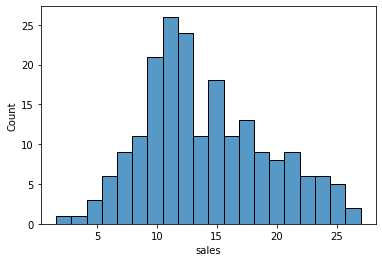

In [47]:
sns.histplot(data=df,x='sales', bins= 20)

In [49]:
mean_absolute_error(y_test,test_predictions) # this gives the mean absolute error for the true y value(y_test) and the predicted value for y(test_predictions)
# This 1.213 is the mean absolute error.

1.213745773614481

In [50]:
mean_squared_error(y_test,test_predictions) # This value can't be compared with the mean('sales') as the units are different

2.2987166978863782

In [51]:
np.sqrt(mean_squared_error(y_test,test_predictions)) # This is the Root mean squared error
# If the absolute error is okay and the rmse is way of it means that the model is performing pretty well for most of the points but we have a few data points which are ways off and that is given by rmse

1.516151937599388

### RESIDUAL POINTS

* Often for Linear Regression it is good idea to seperately evaluate the residuals (y-y') and not just calculate performance metrics(eg.RMSE..)
* We can't see this discrepency of fit visually if we have muliple features!
* Whar we could do is olot the residual error against true y values.
* The Residual errors should be random and close to a normal distribution.
* If we have an absolute perfect fit and We are hitting every single line then the residual would be very close to zero.
* Zero indicates the perfect fit.
* Residual plot shows residual errors vs. true y value. If it is a perfit fit, the point would lie on the zero line.
* Residual plot shows a clear pattern, indicating linear regression is not valid for the dataset.

In [52]:
test_residuals = y_test-test_predictions #This gives the residual value by subtracting the predicted value with the y_test
# If the model is perfect we would have the test_residuals value to be zero

In [53]:
test_residuals # Negative residuals says that the prediction is under estimated and the positive value indicates that the prediction is over estimated

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

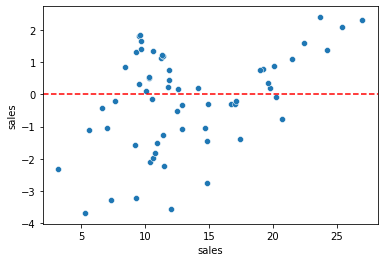

In [57]:
sns.scatterplot(x=y_test, y= test_residuals) # Y_test points are the correct y values and the y axis are the residuals.
# THe y values would be correct values and this plot shows the value by which we are off.
plt.axhline(y=0, color ='red', ls ='--') #Along the axis(y) draw a line with the color red and the linespace red and line style as dashed
# This residual plot shows that there is no clear line or curve that would indicate that something funky is going on with the dataset underneath and we should not use linear regression.
# This should more or less look random and hopefully it should also look distributed around zero.

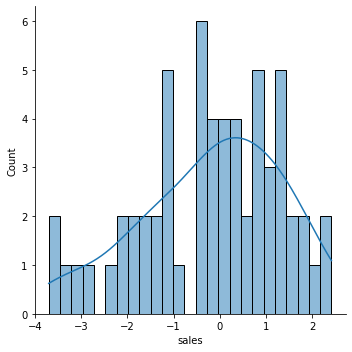

In [58]:
sns.displot(test_residuals, bins =25 , kde= True)

In [59]:
# The normal probability plot allows you to compare what a perfectly normally distributed dataset would look like against your actual values.
import scipy as sp  # Import scipy to use the normal probability plot

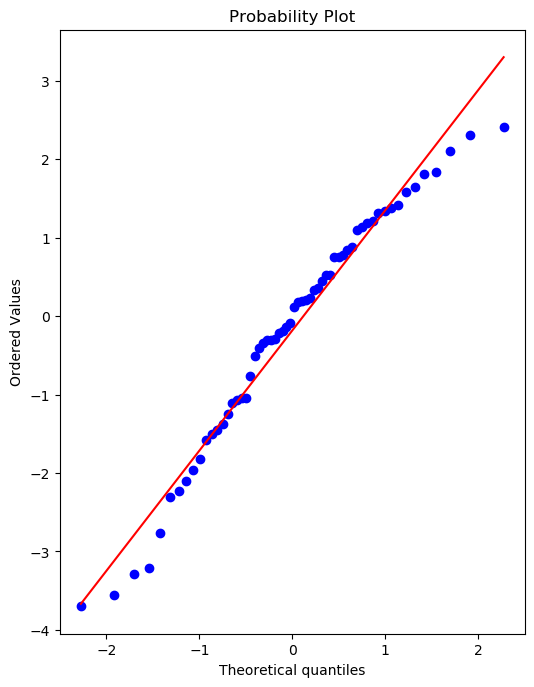

In [60]:
# Creates a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8), dpi = 100)
#Probplot returns the raw values if needed
# we just want to see the plot, so we assign these value to _
_ = sp.stats.probplot(test_residuals, plot = ax)

# The red line is how the normal distribution look like. and the blue dots which diverage from the red line indicates that they are really skewing way off a normal distribution.

### MODEL DEPLOYMENT

In [61]:
final_model = LinearRegression() # This is to deploy the model once we are satisfied with the performance metrix. Remember that the  model(linearRegression) : this should basically be the exact same model type with the same paramters as your model that you adjusted or kept adjusting for the optimal performance of the test set.

In [62]:
final_model.fit(X,y) # Note that the parameters are X and y and not X_train,X_test,y_train as we have decided that these model type of parameters are good enough on a test set.
# So when we deploy it to the real world we want to take full advantage of the entire data set, which is the full X and Y. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
final_model.coef_  #Giev the beta coefficients and they come in the same order as the feature data frame that we passsed in. The forst one is the TV Spend, Radio spend and Newspaper spend
# The beta coefficient is the degree of change in the outcome variable for every 1-unit of change in the predictor variable.
# If the beta coefficient is positive, the interpretation is that for every 1-unit increase in the predictor variable, the outcome variable will increase by the beta coefficient value.  If the beta coefficient is negative, the interpretation is that for every 1-unit increase in the predictor variable, the outcome variable will decrease by the beta coefficient value.

array([ 0.04576465,  0.18853002, -0.00103749])

In [66]:
y_hat= final_model.predict(X)

In [67]:
y_hat

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

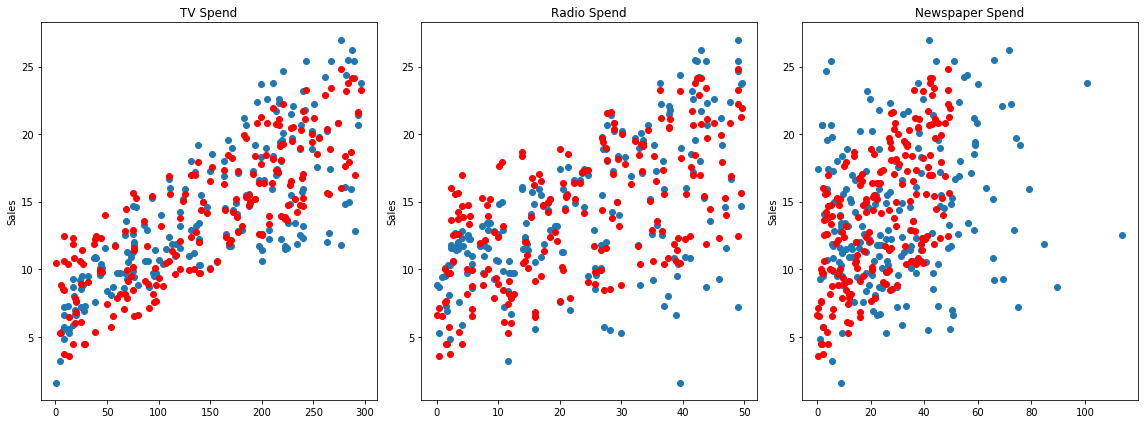

In [68]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

# This can't be plotted for 3-Dimensional Features

In [69]:
from joblib import dump, load  #These two functions dump and load are used to dump or save the model and the also load it back up.

In [70]:
dump(final_model,'final_sales_model.joblib') #'final_sales_model.joblib' -- This is essentially a trained model file that is going to be saved on the computer with the trained 'final_model'

['final_sales_model.joblib']

In [71]:
loaded_model= load ('final_sales_model.joblib') # This is used to load/retrieve the file 'final_sales_model.joblib' and store it in the variable

In [72]:
loaded_model.coef_ # This gives the coeffiecients of the variable, which is the coeficients of 'final_sales_model.joblib'

array([ 0.04576465,  0.18853002, -0.00103749])

In [73]:
X.shape # this is 2 dimensional

(200, 3)

In [74]:
campaign =[[149,22,12]] # [[]] is to get the shapes correctly. Since X.shape is 2 dimensional (200 rows and 3 columns use [[]])
# Here 149 for TV, 22 for Radio and 12 for newspaper

In [75]:
loaded_model.predict(campaign) # This gives the predicted amount of sales for 149 for TV, 22 for Radio and 12 for newspaper values by acting upon the loaded_model

array([13.893032])

In [76]:
# We can't actually check if the prediction is correct or not as this is a new set of values given to the model for which it hasn't worked on 
# But we can get to know the RMSE and MAE will lie in the range of the error obtained from the test data and it performance would also lie in the same range if the new value lies in the range of the exisitng datas

### POLYNOMIAL REGRESSION
* How can we improve on a Linear Regression model?
    * One approach is to consider **higher order relationships** on the features.
    * There are two issuses polynomial regression will address for us.
        * Non-Linear feature relationship to label
        * Interation terms between features
    * The main point here is to show it could be reasonable to solve for a single linear Beta Coefficient for polynomial of an original feature.
    * **Interaction terms** just means that what happens if two features are only significant when they're in sync with one another.
    * Polynomial features tool, which automatically creates both higher order feature polynomials and the interaction terms between all feature combinations.
    * The Polynomial regression creates the following:
        * The Bias (the value of 1.0)
        * Values raised to the power of each degree (e.g x^1,x^2, x^3...)
        * Interactions between all pairs of features (e.g x1 * x2 , x1 * x3,..)
     * Converting Two factors A and B: 1, A,B,A^2,AB,B^2 
     * Generalized terms of features X1 and X2 : 1, X1, X2, X1^2 , X1X2, X2^2
     * Example if row was x1= 2 and x2=3, then the value would be: 1,2,3,4,6,9

### POLYNOMIAL REGRESSION - CREATING POLYNOMIAL FEATURES. 

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [80]:
X = df.drop('sales',axis =1) # To get the X features seperated out from the df

In [81]:
y = df['sales'] #To seperate out the y feature

In [82]:
from sklearn.preprocessing import PolynomialFeatures #Imports polynomialfeatures from scikit learn
# The way polynomial feature works is it is in the same framework as linear regression or any other model of scikit learn. 
# We create an instance of polynomial features and fit it to our dataset   

In [83]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias= False) #Degree is the degree of the polynomial 
polynomial_converter.fit(X) # Fit the dataset to the polynomial converter. Here we fit it to the X- feature. Fitting here means to grab and analyse all the data values 
# This doesn't transform the X features

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [89]:
poly_features = polynomial_converter.transform(X) # This tansfer the objects to the second degree polynomial

In [90]:
poly_features.shape # We have 200 rows and 9 columns, we can see that the objects has been transformed.

(200, 9)

In [87]:
X.shape # But here we can see that there are 200 rows and 3 columns

(200, 3)

In [92]:
X.iloc[0] #Gives the values of the features at the 0th index location

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [91]:
poly_features[0] #Grabbing the first row of poly_features. The values of X at 0th location has changed from three values to 9 values in the poly_feature's zeroth location

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [93]:
# In the above output, we can see that it is 2.3*10^2, 3.78*10^2, 6.92*10^2 which is the same three values of the X feature
# These three values (5.294601e+04 (TV^2) ,8.697780e+03 (TV*Radio), 1.592292e+04 (TV*newspaper)) are the interaction terms.
# These three terms (1.428840e+03 (radio ^2), 2.615760e+03 (Radio*newspaper), 4.788640e+03 (newspaper ^2)) are the square of itself.

In [94]:
# In general, many tools within scikit learn, ask you to first fit to the data in order to define the data range. So you're going to be using and then if you actually transform the data to some other data set, it will ask you to transform it.
# So there is this fit transform functionality happening here in two steps because it's so common to fit and transform on the exact same data set. There is a fit_transform method

In [95]:
polynomial_converter.fit_transform(X) # This does both the fit and transform in the same step. The fit is not doing much. It's just analyzing what degree we want to go to and then taking in all the data.
# Transform is where all the work is happening as far as creating a new dataset
# Fit_transform does the exact same thing we just saw earlier in one step.
# Calling fit alone will not return anything until the transform is called.

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

### POLYNOMIAL REGRESSION - TRAINING AND EVALUATION

In [97]:
from sklearn.model_selection import train_test_split #Importing train test split from scikit learn

In [99]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101) # We have changed the X to poly_features because we want to perform on the entire 9 columns
#Type train_test_split and copy the above code inorder to do the tuple unpacking in the correct order

In [100]:
from sklearn.linear_model import LinearRegression #Importing Linear regression from the linear model

In [101]:
model = LinearRegression()

In [102]:
model.fit(X_train,y_train) # This is now training a regression model on nine features instead of three

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
test_predictions = model.predict(X_test) # This X_test is 9 features. If we try to pass in three features it will throw an error as it nin beta coefficient

In [104]:
model.coef_ #To check the count of coefficients

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [106]:
MAE = mean_absolute_error(y_test, test_predictions) # Creating a MAE variable to get the mean absolute error by comparing the y_test values with the test_predictions

In [107]:
MSE = mean_squared_error(y_test, test_predictions) # Creating a MSE variable to get the mean Squared error by comparing the y_test values with the test_predictions

In [108]:
RMSE = np.sqrt(MSE) #This gets the root mean squared error taking the square root of the MSE

In [109]:
MAE #Gets the value of MAE

0.4896798044803811

In [110]:
RMSE # Gets the value of RMSE

0.6646431757269268

In [111]:
# The value obtained by linear regression last time was MAE: 1.213 and RMSE: 1.516. Hence the polynomial regression model is performing much better than just a linear regression
# It is important to note that the only way to fairly compare your previous values is if you perform the excat same train_test_split in this model as you did on the other one.
# And we made sure that by chossing the same test size ratio here and the same random state (test_size=0.3, random_state=101) which basically grabs the same index row as it did previously.


In [112]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [113]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

### BIAS VARIANCE TRADE-OFF (OVERFITTING VS UNDERFITTING)

* This is the same for all Machine Learning problems.
* We have seen that a higher order polynomial model performs significantly better than a standard linear regression model.
* In general increasing model complexity in search for better performance leads to a Bias- variance trade-off
* We want to have a model that can generalize well to new unseen data, but can also account for variance and patterns in the known training data.
* Extreme Bias or Extreme variance can both lead to bad models.
* The model that underfits is high bias and the model that overfits is high variance
**Overfitting**
* Overfitting is when the model fits too much to the noise or variance from the data.
* This often results in **low error on training sets, but high error on test or validation sets**
* Overfitting, again, overfitting is when the models fitting too much to the noise and variance in the training data.
* So this is a hugh variance model.
* The model will perform very well on a train data that have poor performance on new unsign data.

**Underfitting**
* Underfitting is when the model does not capture the underlying trend of the data and does not fit the data well enough
* Low Variance but high bias
* Underfitting is often a result of an excessively simple model.
* Model has high bias and is generalized too much
* Underfitting can lead to poor performance in both training and testing data sets.

**Overfitting Versus Underfitting**  
* Overfitting can be harder to detect, since good performance on training data could lead to a model that appears to be performing well.
* How to see underfitting or overfitting when we have multi dimensional data sets.
    * Lets plot error vs model complexity (When we say that the model is complex that means its a higher order polynomials)
    * A really good model, as we increase the model complexity the error is lower. This is the ideal situtation.
    * For polynomial regrssion case, as we increase the degree of polynomial, the error is going to decrease in general.
    * A Bad model will have an increase in error as we increase the complexity.
    
* When we think about overfitting and underfitting we want to keep in mind the relationship of the model performance on the training set versus the test/validation set.
* lets imagine we split our data into a training set and a test set. And now we are trying to choose what complexity of model is most appropriate, what polynomial degree should I choose?
* We first see the **performace on the training set** (The error vs model complexity; ideally the error should decrease with the increase in complexity.
* Next we should see the **performance on the test set** (The The error vs model complexity; ideally the error should decrease with the increase in complexity. If we overfit with the training set, we would eventually perform poorly on the test set that is the error increase with the complexity)
* This means when the deciding the optimal model complexity **and** wanting to fairly evaluate our model's performance,we can consider both the train error and test error to select an ideal complexity.
* In the case of polynomial regression,complexity directly relates to the degree of the polynomial, but many machine learning algorithms have their own hyperparameters that can increase complexity.

### POLYNOMIAL REGRESSION - CHOOSING THE DEGREE OF POLYNOMIAL

* We will need to understand error for both training and test data to look out for potential overfitting.
* To choose a polynomial degree without actually overfitting, we can create a loop with the following as the main step.
    * Create the different order polynomial
    * Split that polynomial features into training set and test set
    * Fit on the training data.
    * Store or save the RMSE for **BOTH** the train and the test set.
    * Plot the result (Error VS Polynomial order)

In [120]:
train_rmse_errors = [] # Creating an empty list that store the training sets root mean squared error.
test_rmse_errors =[] #Creating an empty list that store the test sets root mean squared error.

for d in range(1,10):  # For degree in range (the range can be anything but larger the range that we test,the more degrees we take into account, but longer is the training time)
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False) # Creates a polynomial feature set for each degree from 0 to 10
    poly_features = poly_converter.fit_transform (X) #Creating a polynomial features.
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101) #Splitting it into the test and train datas
    
    model= LinearRegression() # Creating a model using linear regression
    model.fit(X_train,y_train) # Fitting the model on the training datas
    
    train_pred = model.predict(X_train) # getting the model prediction on the x training data.
    test_pred = model.predict(X_test) # Getting the model prediction on the x test datas. With the prediction on X_train and X_test we can get to know if it is over fitting or underfitting
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred)) # Getting the training datas error; so we are compairing the y_train with train_pred
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))# Getting the testing datas error; so we are compairing the y_test with test_pred.
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [115]:
train_rmse_errors #Gets the training root mean square error for each degree of polynomial
# Note that the error goes down. The fact that the error goes up at 5.421 is a red sign that we shouldn't be going to this high of a polynomial if we are even spiking on the training data. 
# even after the spike the error goes way down, So obviously some extreme overfitting happening at really high polynomial levels

[1.7345941243293763,
 0.587957408529223,
 0.43393443569020645,
 0.3517083688399347,
 0.2509342943960959,
 0.20160290070544867,
 5.421203263276888,
 0.1414815558138144,
 0.16736049464194908]

In [121]:
test_rmse_errors # Gets the test root mean square error for each degree of polynomial
# After 0.5077, the error shoots up 

[1.5161519375993877,
 0.6646431757269268,
 0.5803286825164427,
 0.507774264674175,
 2.5758320908277432,
 4.498347849027601,
 1380.9619395715383,
 4365.674723482999,
 95165.57598703183]

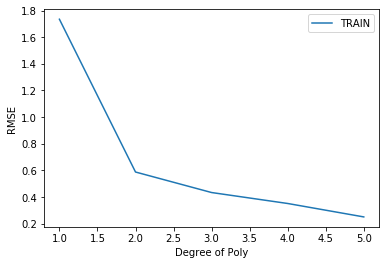

In [118]:
plt.plot(range(1,6), train_rmse_errors[:5], label ='TRAIN') #Plots for the first 6 range values, for  which we take the train root mean square value of the first 5 valuee.
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

# Plots the train error values

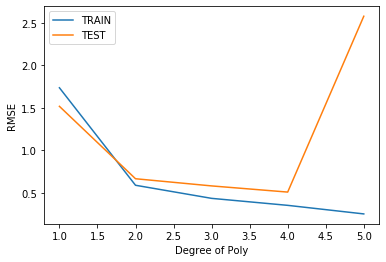

In [122]:
plt.plot(range(1,6), train_rmse_errors[:5], label ='TRAIN') #Plots for the first 6 range values, for  which we take the train root mean square value of the first 5 entities
plt.plot(range(1,6), test_remse_errors[:5], label ='TEST') # #Plots for the first 6 range values, for  which we take the test root mean square value of the first 5 entities
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [123]:
# From the plot we can see that as we try to fit after the 4th degree polynomial the test set values begins to explode even when the train set values continous to decrease for the training set.

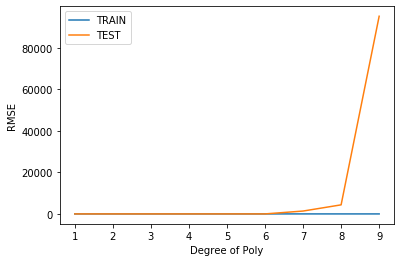

In [125]:
plt.plot(range(1,10), train_rmse_errors, label ='TRAIN') #Plots for the first 6 range values, for  which we take the train root mean square value of the first 5 entities
plt.plot(range(1,10), test_remse_errors, label ='TEST') # #Plots for the first 6 range values, for  which we take the test root mean square value of the first 5 entities
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [126]:
# When we try to undo the indexing and explore it, we see that notice that those initial explosions of root means greater on the test are nothing compared to the insane error you get on your test data as you go to some eighth or ninth degree polynomial here.
# And notice again that the training error is fantastic. Even an extreme degree is a polynomial, which makes sense because as you get more and more fit to your training data, you eventually overfit to your training data and eventually your error starts going more and more towards zero as you're picking up every single piece of noise and variance in that data set.
# So clearly, we don't want to go up to some eighth or ninth degree polynomial.
# SO if when we have to decide what polynomial degree to choose (3 or 4), you should either choose a second or your polynomial or maybe a third degree, but going up to four, even if the performance here warrants it is probably not necessary, given the fact that you are kind of at the region of risk to evidently explode onto your test root mean square error.
# We should choose something like a second degree or third degree (for this case), given the data set and given the context of what we're actually working with.

# take a look at the raw data behavior and also visualize it to make sure you're not overfitting.

### POLYNOMIAL REGRESSION - MODEL DEPLOYMENT

In [127]:
#Lets assume we choose the dgree of polynomial as 3 for the above problem and get the polynomal features for it

In [128]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias= False) # Creating a final polynomial converter with degree 3 and bais not included.

In [129]:
final_model = LinearRegression() # Creating a final Model

In [130]:
full_converted_X = final_poly_converter.fit_transform(X) # To be fitted on the converted data and not the full data. 
final_model.fit(full_converted_X, y) # Fitting it on the converted X and y

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
from joblib import dump, load

In [132]:
dump(final_model, 'final_poly_model.joblib') # Saving the final model

['final_poly_model.joblib']

In [133]:
dump(final_poly_converter,'final_converter.joblib') # saving the final converter

['final_converter.joblib']

In [134]:
loaded_converter = load('final_converter.joblib') # loading the converter

In [135]:
loaded_model = load('final_poly_model.joblib') # loading the model

In [141]:
campaign =[[149,22,12]] # Creating a new value for the TV, Newspaper and Radio

In [142]:
loaded_converter.fit_transform(campaign) # Gets the interaction terms, cube and sqaured terms for these features

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [149]:
loaded_converter.fit_transform(campaign).shape # Gives the shape of the loaded converter 

(1, 19)

In [150]:
transformed_data =loaded_converter.fit_transform(campaign) # Assigns the value of the converter to the variable

In [151]:
loaded_model.predict(transformed_data) #Gets the preicted values for the given campaign

array([14.64501014])

### REGULARIZATION

* Regularization seeks to solve a few common model issues by:
    * Minimizing model complexity
    * Penalizing the loss function
    * Reducing the model overfitting (Add more bias to reduce model variance)
* Three main types of Regularization:
    * L1 Regularization
        * LASSO Regression
    * L2 Regularization
        * Ridge Regression
    * Combining L1 and L2
        * Elastic Net
        
* **L1 Regularization** adds a penalty equal to **absolute value** of the magnitude of the coefficients.
    * Limits the size of the coefficient
    * Can yield space models where come coefficients can become zero.
    
* **L2 Regularization** adds a penalty equal to the **square** of the magnitude of coefficients.
    * All coefficients are shrunk by the same factor.
    * Does not necessarily eleminate coefficients.
    
* Elastic net combines L1 and L2 with the addition of an alpha parameter deciding the ration between them.

* These regularization methods do have a cost:
    * Introduce an additional hyperparameter that needs to be tuned
    * A mulitplier to the penalty to decide the "Strength" of the penalty.

### FEATURE SCALING

* Feature Learning provides many benefits to our machine learning progess!
* Some ML model that rely on the distance metrics (e.g KNN) **require** scaling to perform well.
* Feature scaling improves the convergence of the steepest descent algorithm, which do not process the property of scale invariance.
* If features are on different scales, certain weights may update faster than others since the feature values x(j) play a role in the weight updates.
* Scaling the features so that their respective ranges are uniform is important in comparing measurements that have different units.
* Allows us directly compare model coefficients to each other.

* **Feature Scaling Caveats:**
    * Must always scale new unseen data before feeding to model.
    * Effects direct interpretability of feature coefficients.
        * Easier to compare coefficients to one another, harder to relate back to original unscaled feature.

* **Feature Scaling Benefits:**
    * Can lead to great increase in performance.
    * Absolutely necessary for some models
    * Virtually no "real" downside to scaling features.
    
* **Two main ways to Scale Features:**
    * Standardization: 
        * Rescales data to have a mean(mu) of 0 and standard deviation (sigma) of 1
    * Normalization:
        * Rescales all data values to be between 0-1.
        
* **Standaradization A.K.A Z- Score Normalization:**
    *  X(changed) = (X -(mean))/ standard deviation.
    
* **Normalization:  Simple and easy to understand**
    * X(changed) = (X- X(min))/(X(max)-X(min))
    
* A **.fit()** method calls simply calculates the necessary statistics (Xmin(for normalization), Xmax (for normalization), mean(for Standardization), Standard Deviation (for Standardization)).
* A **.transfrom()** call actually scales data and returns the new scaled version of the data.

* very important consideration for fit and transform:
    * We only **fit to training data.**
    * **Calculation statistical inforamtion** should only come **from training data.**
    * Don't want to assume prior knwledge of the test set!

* Using the full data set would cause **Data Leakage**:
    * Calculating statistical information from full data leads to some information of the test set leakage into the taining process upon tranform() conversion.
    
* **Feature Scaling process:**
    * Perform train- test split.
    * Fit to training feature data.
    * Transform training feature data.
    * Transform test feature data.
    
* Do we need to scale the label?
    * In general it is not necessary nor advised.
    * Normalising the output distribution is altering the definition of the target.
    * Predicting a distribution that doesn't mirror you.
    * Can negatively impact stochastic gradient descent.


### INTRODUCTION TO CROSS VALIDATION:

* Cross validation is more advanced set of methods for splitting data into training and testing set,

* For the cross validation, split the data into k equal part(the valu of K is our choice), then 1/k is the test set. train the model and then get the error metrics for the split. Repeat the above for another 1/k split and get the error. The idea is to repeat this for all possible splits( k number of time), then get the mean of all the errors Error1,error 2,... error k. Average Error is the expected Performance. As we have test on all the data and evaluated all the data. The computation has to be repearted k number of times and the process becomes expensive if the dataset is big.

* This  is known as **k-fold Cross-Validation**.
* Common choice of k is  so each test set is 10% of the total data set.
* Largest K possible would be k equal to the number of rows.
    * This is known as **leave one out ** cross validation
    * Computationally expensive.
* One consideration to note with the k-fold cross validation and a standard train test split is fairly tuning hyperparameters.

* HOLD-OUT TEST SET:
    * Start with entire data set.
    * Remove a hold out test set. (This is set of data that the model never gets to see and has not been adjusted to)
    * Perform a "classic" train test split.
    * Train and tune on this data.
    * Or do a k-fold cross validation.
    * After training and tuning perform final evalution on the hold out test set.
    * NOTE : Cant tune after this final test evaluation (This gives the validation to how much good the model performs).

**TRAIN|VALIDATION(TEST)|TEST SPLIT(HOLD-OUT SET)**
    * Allows us to get a true final performance metric to report.
    * No editing model after this!

* keep in mind:
    * Previous modeling work
    * Reporting requirements
    * Fairness of evaluation
    * Context of data and model.
   


### REGULARIZATION FOR LINEAR REGRESSION DATA SETUP



In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [155]:
df = pd.read_csv ("Advertising.csv") # Reads The advertising files
df. head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [156]:
X= df.drop('sales', axis =1) # Splitting up the features
y= df['sales'] # Setting the label

In [157]:
from sklearn.preprocessing import PolynomialFeatures #From the scikit learn preprocessing import the polynomial features

In [158]:
Polynomial_convertor = PolynomialFeatures(degree = 3, include_bias=False) # Creates the convertor with the polynomial degree 3 

In [159]:
poly_features = Polynomial_convertor.fit_transform(X) # Creates the feature by using the X data on the polynomial convertor

In [161]:
poly_features.shape # Gets the shape of the poly_feature and it includes all the interaction terms and the 2nd and 3rd power term

(200, 19)

In [162]:
from sklearn.model_selection import train_test_split # Imports the train test split function from model selection

In [172]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101) #Copy paste it from "train_test_split" and shift tab
# Note that we want to pass in poly features as we want it with the interaction terms as well

In [173]:
X_train.shape

(140, 19)

In [168]:
from sklearn.preprocessing import StandardScaler # imports Standard scalar from preprocessing library inorder to scale the data

In [169]:
scalar = StandardScaler() # Creating an instance of the Standard Scaler
# The standardization or the normalization or scaling method is going to scale based off mean value or standard deviation.
# The mean/ standard deviation should be calculated from the training set as we do not want to assume any values from the test set as that would result in data leakage

In [177]:
scalar.fit(X_train) # The instance is fitted to the training set before it is scaled.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [178]:
Scaled_X_train = scalar.transform (X_train) # Scaling the X_train value

In [179]:
Scaled_X_test = scalar.transform(X_test) # Scaling the X_test values

In [180]:
Scaled_X_train[0] # Grabbing the first row of X_train, we can see that the values have been scaled down

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [181]:
poly_features[0] # getting the original values which isn't scaled

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

### L2 REGULARIZATION - RIDGE REGRESSION THEORY

* Ridge regression is a regularisation technique that works by helping reduce the potential for overfitting to the training data.
* It does this by adding in a penalty term to the error that is based on the squared value of the coefficients.
* Ridge Regression is a regularization method for Linear Regression.
* The goal of retrogression is to help prevent overfishing by adding in an additional penalty term.
* Ridge Regression adds a shrinkage Penalty
* Ridge Regression seeks to minimize this entire error term RSS (Residual sum of squares)+ Penalty.
* Shrinkage Penalty is based off the squared coefficients.
* Shrinkage Penalty has a tunable lambda parameter.
* Lambda determines how severe the Penalty will be range from 0 to positive infinity.
* If it is zero it would just return back RDD as the error term
* Trying to minimize a squared beta term leads us to punish larger coeficcients.
* In the case of a single feature, a larger beta means a steeper sloped line and a steeper sloped line would mean more responsees per increase in x value.
* To choose the best lambda funciton, we should use cross- validation to explore multiple lambda options and choose the best one based on the performance metrix (MAE and RMSE)


#### IMPORTANT NOTES:

* Sklearn refers to lamdba as alpha within the class call.
* For cross validation metrics, sklearn metrics uses a "scorer object".
* All scorer objects follow the convention that **higher** return values are **better** than the lower return values.
* For example, obviously higher accuracy is better.
* But higher RMSE is actually worse.
* So scikit learn fixes this by using a **negative RMSE** as its scorer metrics. (The higher the negavite RMSE, the better it actually is).
* This allows for uniformity across all scorer metrics, even across different tasks type.
* The same idea of uniformity across model classes applies to referring to the penalty strength parameter as **alpha**

In [182]:
from sklearn.linear_model import Ridge # From linear model importing Ridge

In [183]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model.ridge:

class Ridge(_BaseRidge, sklearn.base.RegressorMixin)
 |  Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape [n_samples, n_targets]).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, array-like}, shape (n_targets)
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of t

In [184]:
ridge_model = Ridge(alpha=10) #Creating a ridge model and choosing the hyperparameter (a hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters are derived via training.)

In [235]:
ridge_model.fit(Scaled_X_train,y_train) # fitting the Scaled_X_train and y_train to the ridge model

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [236]:
test_predictions =ridge_model.predict(Scaled_X_test) # Predicting the output derived when the Scaled_X_test is applied on the ridge model

In [237]:
from sklearn.metrics import mean_absolute_error,mean_squared_error  # importing the MAE and MSE from the metrics library.

In [238]:
MAE = mean_absolute_error(y_test, test_predictions) # Finding the MAE and comparining the y_test values to the test prediction

In [239]:
MAE

0.5774404204714181

In [240]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions)) # Finding the RMSE
RMSE

0.8946386461319683

In [241]:
from sklearn.linear_model import RidgeCV # Imports the Cross Validation for the Ridge funciton from Linear Regression
# It return backs the best alpha value based of the Cross validation which is the average error metrics for all of these.

In [242]:
ridge_cv_model= RidgeCV(alphas=(0.1,1.0,10.0))  # Here the alpha value is the tuple of alpha values to try and here we are going to do the cross validation for three different times 0.1,1.0,10.0

In [246]:
ridge_cv_model.fit(Scaled_X_train, y_train) # Here we are using the training sets for the purpose of hyperparameter tuning.  For CV, the training set is going to become the training set and a portion of it is going to be a validation set

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [247]:
ridge_cv_model.alpha_ # The .alpha_ gives the best performing alpha

0.1

In [248]:
from sklearn.metrics import SCORERS # Imports the SCORERS From metrics and this is a dictionary.

In [249]:
SCORERS.keys() # Gives the list of errors that we can try to work with as our scoring metrics. The error metrics are transformed to perform better

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [250]:
ridge_cv_model= RidgeCV(alphas=(0.1,1.0,10.0), scoring='neg_mean_absolute_error') # This sepcifies the scoring metrics based on which the best alpha would be chosen

In [271]:
ridge_cv_model.fit(Scaled_X_train, y_train) # Apply the training values to the model where the scoring is mentioned

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring='neg_mean_absolute_error',
        store_cv_values=False)

In [272]:
ridge_cv_model.alpha_ # Gives the alpha obtained based on the scoring metrics

0.1

In [273]:
test_predictions =ridge_cv_model.predict(Scaled_X_test)

In [274]:
MAE = mean_absolute_error(y_test, test_predictions)

In [275]:
MAE

0.4273774884332635

In [276]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions)) # Finding the RMSE
RMSE

0.6180719926927672

In [208]:
ridge_cv_model.coef_ # Gives the coefficients

array([ 8.51968371e-02,  2.99658968e-02,  1.20416099e-02, -4.07134573e-04,
        1.55118134e-03, -3.34145741e-04, -1.74740476e-03,  8.97282475e-04,
        2.56929023e-04,  5.70417387e-07, -1.80861026e-06,  1.04066828e-06,
        2.60515468e-06, -1.72662383e-06,  1.99963183e-08,  2.18365479e-05,
       -8.51502507e-06, -3.72259823e-06, -1.91758330e-06])

### L1 REGULARIZATION - LASSO REGRESSION - BACKGROUND AND IMPLEMENTATION

* L1 Regularization adds a penalty equal to the **absolute value** of the magnitude of the coefficent.
    * Limits the size of the coefficients.
    * Can yield spares model where some of the coefficients can become zero.
* LASSO can forces some of the coefficicent estimates to be exactly equal to zero when tuning parameter (lambda) is sufficiently large.
* Similar to subset selection, LASSO performance variable selection.
* Models generated from LASSO are generally much easier to interpret.
* LASSOCV with scikit operations on checking the number of alphas within a range, instead of providing the alphas directly.


**LASSO - Least Absolute Shrinkage and Selection Operator**

In [209]:
#from sklearn.linear_model import Lasso # Imports Lasso from linear model

In [210]:
#Lasso   #If we use only Lasso then we would have to give the alpha terms which isn't too convenient to have known the correct alpha before hand

sklearn.linear_model.coordinate_descent.Lasso

In [211]:
from sklearn.linear_model import LassoCV  # So we import LassoCV to perform Cross Validation to get the best alpha value

In [218]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas = 100, cv=5) # Eps is the epsilon which is the ratio of alpha_min to alpha_max and the default value is 0.001 and n_alphas is the number of alphas we want to check and the default value is 100
# As the eps value gets smaller then that means that we are checking larger subsets of possible values
# Cv is the number of folds in K-fold cross validation and default is the 5 fold cross validation

In [233]:
lasso_cv_model.fit(Scaled_X_train,y_train) # Fitting the training data to the model and this checks a list of alpha values

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.1, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [234]:
lasso_cv_model.alpha_ # Getting the best alpha for the model

0.4943070909225828

In [262]:
test_predictions = lasso_cv_model.predict(Scaled_X_test) # The prediction for the Scaled X test is obtained 

In [263]:
MAE = mean_absolute_error(y_test, test_predictions) # The MAE of the y_test and the test predictions are obtained.
MAE

0.6541723161252854

In [305]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions)) # Finding the RMSE
RMSE

1.137219761441209

In [265]:
# Here we can see that LassoCV doesn't perform that well as the Ridge Regression as the Error values are higher.

In [266]:
lasso_cv_model.coef_ # Gets the coefficient and here we can see that there is only two features and the ther are zero.
# Since most of the features are made to be zero, and allows us to easily interpret the feature values

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

### L1 AND L2 REGULARIZATION - ELASTIC NET

* Lasso:
    * A convex object that lies tangent to the boundary, is likely to encounter a corner of a hypercube, for which some component of Beta are identically zero.
    
* Ridge:
    * In the case of an n-sphere, the points on the boundary for which some of the components of Beta are zero are not distinguished from the others and the convex object is more likely to contact a point at which some components of Beta are zero than one for which none of them are.

In [277]:
from sklearn.linear_model import ElasticNetCV # Imports ElasticNet CV from linear model. Using ElasticNet, we would haveto use Cross-validation to get reasonable results for what the ratio should be and the outside lambda should be
# Note that a good choice of list of values for L1_ratio is often to put more value close to 1(Lasso) and less close to 0 (ridge) as in [.1,.5,.7,.9,.95,.99,.1]

In [297]:
elastic_model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,.1], eps= 0.1, n_alphas = 100, cv=5) #The n_alpha here refers to the outside lamba and the L1- ratio refers to the alpha in the equation and the values mentioned here are default but we can defenitely play with them

In [298]:
elastic_model.fit(Scaled_X_train,y_train) # Fits it to the training data

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.1, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.1], max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [299]:
elastic_model.l1_ratio # Getting the L1 ratios

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.1]

In [300]:
elastic_model.l1_ratio_ # Gives the best performing L1 Ratio

0.99

In [301]:
elastic_model.alpha_ # Gives the best alpha value

0.4993000918409927

In [302]:
lasso_cv_model.alpha_

0.4943070909225828

In [303]:
test=elastic_model.predict(Scaled_X_test)

In [304]:
MAE = mean_absolute_error(y_test, test_predictions) # The MAE of the y_test and the test predictions are obtained.
MAE

0.6617906549499435

In [306]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions)) # Finding the RMSE
RMSE

1.137219761441209

In [307]:
# Here we can see that the alpha values and the MAE and the RMSE are almost similar to the LASSO Regression as the L1 value was 0.99 
# Hence the elastic model performs more like a Lasso Regression for this case.
# If the L1 value was close to zero then it would have performed like Ridge Regression